In [1]:
#Importing relevant libraries

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cmasher as cmr

In [2]:
#reading the csv file where all data is provided

#parsing "Date" column to convert it to Python recognizable datetime format

df=pd.read_csv('C:/Users/ANKAN/Documents/covid-19-india-data-master (1)/covid-19-india-data-master/complete.csv',parse_dates=['Date'])

In [3]:
#Setting Date as the index for the entire dataframe

df.set_index("Date", inplace = True) 
df

,State,Total Cases,New Cases
Date,,,
4/3/2020,Andaman and Nicobar Islands,10,0
4/4/2020,Andaman and Nicobar Islands,10,0
4/5/2020,Andaman and Nicobar Islands,10,0
4/6/2020,Andaman and Nicobar Islands,10,0
4/7/2020,Andaman and Nicobar Islands,10,0
...,...,...,...
7/13/2020,West Bengal,30013,1560
7/14/2020,West Bengal,31448,1435
7/15/2020,West Bengal,32838,1390


In [4]:
#Separating the dataframe into different columns on the basis of states

#Unfortunately only those have been xhosen for which sufficient information 
#regarding both testing and daily positive cases is available

df1=df[df['State']=='Andhra Pradesh']
df4=df[df['State']=='Bihar']
df7=df[df['State']=='Delhi']
df9=df[df['State']=='Gujarat']
df10=df[df['State']=='Haryana']
df13=df[df['State']=='Jharkhand']
df14=df[df['State']=='Karnataka']
df15=df[df['State']=='Kerala']
df17=df[df['State']=='Madhya Pradesh']
df18=df[df['State']=='Maharashtra']
df24=df[df['State']=='Punjab']
df25=df[df['State']=='Rajasthan']
df26=df[df['State']=='Tamil Nadu']
df29=df[df['State']=='Uttar Pradesh']
df30=df[df['State']=='Uttarakhand']
df31=df[df['State']=='West Bengal']

In [5]:
#Placing all the columns into one combined dataframe

df1['AP'] = pd.Series(df1['New Cases'])
df1['BHR'] = pd.Series(df4['New Cases'])
df1['DEL'] = pd.Series(df7['New Cases'])
df1['GUJ'] = pd.Series(df9['New Cases'])
df1['HAR'] = pd.Series(df10['New Cases'])
df1['JH'] = pd.Series(df13['New Cases'])
df1['KAR'] = pd.Series(df14['New Cases'])
df1['KER'] = pd.Series(df15['New Cases'])
df1['MP'] = pd.Series(df17['New Cases'])
df1['MAH'] = pd.Series(df18['New Cases'])
df1['PUN'] = pd.Series(df24['New Cases'])
df1['RAJ'] = pd.Series(df25['New Cases'])
df1['TN'] = pd.Series(df26['New Cases'])
df1['UP'] = pd.Series(df29['New Cases'])
df1['UTT'] = pd.Series(df30['New Cases'])
df1['WB'] = pd.Series(df31['New Cases'])

C:\Users\ANKAN\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ANKAN\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ANKAN\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [6]:
#Removing unnecessary columns
df1=df1.drop(['Total Cases', 'New Cases', 'State'], axis = 1) 

#Removing the last row (since data wasn't available) and converting datatype to numeric for future calculations

df1=df1.iloc[:-1]
df1 = df1.apply(pd.to_numeric)
df1

,AP,BHR,DEL,GUJ,HAR,JH,KAR,KER,MP,MAH,PUN,RAJ,TN,UP,UTT,WB
Date,,,,,,,,,,,,,,,,
4/3/2020,46,1,67,5,0,1,14,21,0,0,0,25,75,0,3,27
4/4/2020,29,5,167,8,6,0,4,9,5,88,7,46,102,61,6,16
4/5/2020,0,1,59,10,0,0,16,11,0,67,4,21,74,53,6,0
4/6/2020,65,0,58,17,35,1,7,8,61,200,11,53,86,0,4,11
4/7/2020,40,2,20,22,6,1,0,13,0,58,8,35,50,78,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/12/2020,1813,798,1781,872,648,194,2798,488,544,8139,230,574,3965,1392,44,1344
7/13/2020,1933,1269,1573,879,658,143,2627,435,431,7827,234,644,4244,1384,120,1560
7/14/2020,1935,1317,1246,902,654,142,2738,449,575,6497,357,544,4328,1654,71,1435


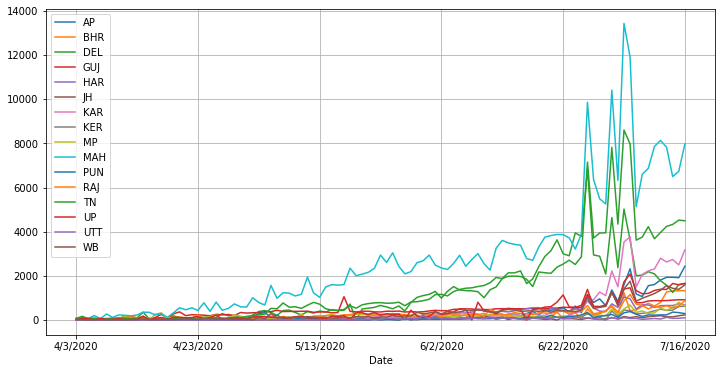

In [7]:
df1.plot(y=['AP',  'BHR', 'DEL', 'GUJ', 'HAR','JH', 'KAR', 'KER', 'MP', 'MAH', 'PUN', 'RAJ', 'TN', 'UP', 'UTT',
       'WB'], figsize = (12,6), grid = True, legend = True)

In [8]:
#Saving the newly modified csv file on device for future use

DF=df1
DF.to_csv('State_wise_New_Cases.csv')

In [9]:
#Reading another csv file (which contains information related to tests conducted)

df=pd.read_csv('C:/Users/ANKAN/Documents/covid-19-india-data-master (1)/covid-19-india-data-master/tests_state_wise.csv',parse_dates=['Updated On'], dayfirst=True)

In [10]:
#Sorting the dataframe to enable better manual interpretation

df=df.sort_values(['Updated On','State'])
df.set_index("Updated On", inplace = True) 
df

,State,Total Tested,Positive,Test positivity rate,Tests per million
Updated On,,,,,
2020-04-01,Delhi,2621.0,NaN,0.00%,132.0
2020-04-01,Kerala,7965.0,265.0,3.33%,227.0
2020-04-01,West Bengal,659.0,37.0,5.61%,7.0
2020-04-02,Andhra Pradesh,1800.0,132.0,7.33%,34.0
2020-04-02,Assam,962.0,16.0,1.66%,28.0
...,...,...,...,...,...
2020-07-16,Telangana,222693.0,41018.0,NaN,NaN
2020-07-16,Tripura,95328.0,2379.0,NaN,NaN
2020-07-16,Uttar Pradesh,1325327.0,43441.0,NaN,NaN


In [11]:
#Removing first few rows so that we have same starting point as that for number of cases
df=df.iloc[368:]

#Similar technique as was applied to earlier dataframe

df1=df[df['State']=='Andhra Pradesh']
df4=df[df['State']=='Bihar']
df7=df[df['State']=='Delhi']
df9=df[df['State']=='Gujarat']
df10=df[df['State']=='Haryana']
df13=df[df['State']=='Jharkhand']
df14=df[df['State']=='Karnataka']
df15=df[df['State']=='Kerala']
df17=df[df['State']=='Madhya Pradesh']
df18=df[df['State']=='Maharashtra']
df24=df[df['State']=='Punjab']
df25=df[df['State']=='Rajasthan']
df26=df[df['State']=='Tamil Nadu']
df29=df[df['State']=='Uttar Pradesh']
df30=df[df['State']=='Uttarakhand']
df31=df[df['State']=='West Bengal']

In [12]:
#Again, making one single dataframe consisting of information for all the concerned states

df1['Tests_AP'] = pd.Series(df1['Total Tested'])
df1['Tests_BHR'] = pd.Series(df4['Total Tested'])
df1['Tests_DEL'] = pd.Series(df7['Total Tested'])
df1['Tests_GUJ'] = pd.Series(df9['Total Tested'])
df1['Tests_HAR'] = pd.Series(df10['Total Tested'])
df1['Tests_JH'] = pd.Series(df13['Total Tested'])
df1['Tests_KAR'] = pd.Series(df14['Total Tested'])
df1['Tests_KER'] = pd.Series(df15['Total Tested'])
df1['Tests_MP'] = pd.Series(df17['Total Tested'])
df1['Tests_MAH'] = pd.Series(df18['Total Tested'])
df1['Tests_PUN'] = pd.Series(df24['Total Tested'])
df1['Tests_RAJ'] = pd.Series(df25['Total Tested'])
df1['Tests_TN'] = pd.Series(df26['Total Tested'])
df1['Tests_UP'] = pd.Series(df29['Total Tested'])
df1['Tests_UTT'] = pd.Series(df30['Total Tested'])
df1['Tests_WB'] = pd.Series(df31['Total Tested'])

C:\Users\ANKAN\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ANKAN\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ANKAN\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [13]:
#Removing unnecessary columns 

df=df1.drop(['State', 'Total Tested', 'Positive', 'Test positivity rate',
       'Tests per million'], axis = 1)

#Removing last row since it had no information
df=df.iloc[:-1]
df

,Tests_AP,Tests_BHR,Tests_DEL,Tests_GUJ,Tests_HAR,Tests_JH,Tests_KAR,Tests_KER,Tests_MP,Tests_MAH,Tests_PUN,Tests_RAJ,Tests_TN,Tests_UP,Tests_UTT,Tests_WB
Updated On,,,,,,,,,,,,,,,,
2020-04-21,35755.0,11999.0,26627.0,36829.0,14562.0,NaN,26233.0,20252.0,20905.0,75838.0,7355.0,61492.0,53045.0,37933.0,4061.0,6182.0
2020-04-22,41512.0,12978.0,28309.0,39421.0,15561.0,5176.0,29512.0,20821.0,22664.0,82304.0,7887.0,66257.0,59023.0,42192.0,4275.0,7037.0
2020-04-23,48032.0,13785.0,30560.0,42384.0,17582.0,5380.0,32122.0,21334.0,24548.0,89197.0,8757.0,69764.0,65977.0,45483.0,4473.0,7990.0
2020-04-24,54338.0,14924.0,33672.0,46743.0,18845.0,6162.0,35958.0,21940.0,26233.0,95210.0,10611.0,74484.0,72403.0,53166.0,4767.0,8933.0
2020-04-25,61266.0,15885.0,35519.0,48315.0,20270.0,6970.0,39083.0,22360.0,27866.0,100912.0,13270.0,78993.0,80110.0,56851.0,5194.0,9880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-11,1136225.0,300762.0,768617.0,457066.0,363428.0,176858.0,819024.0,334849.0,474461.0,1289325.0,388494.0,1032198.0,1566917.0,1116466.0,92198.0,605370.0
2020-07-12,1153849.0,310013.0,789853.0,464646.0,372621.0,180439.0,839074.0,347529.0,486176.0,1321715.0,395185.0,1054080.0,1609448.0,1156089.0,94121.0,617079.0
2020-07-13,1173096.0,319142.0,692845.0,470265.0,381420.0,184656.0,856148.0,416282.0,509223.0,1345128.0,400944.0,1068283.0,1654008.0,1192089.0,96123.0,627438.0


In [2]:
#The above data contains the cumulative tests conducted tests wise
#We need the daily number of tests conducted
#We apply df.diff to get the difference of the consecutive rows across all columns

df1=df.diff()

In [15]:
#Removing first row since it would contain NaN value after df.diff operation

df1=df1.iloc[1:]
df1

,Tests_AP,Tests_BHR,Tests_DEL,Tests_GUJ,Tests_HAR,Tests_JH,Tests_KAR,Tests_KER,Tests_MP,Tests_MAH,Tests_PUN,Tests_RAJ,Tests_TN,Tests_UP,Tests_UTT,Tests_WB
Updated On,,,,,,,,,,,,,,,,
2020-04-22,5757.0,979.0,1682.0,2592.0,999.0,NaN,3279.0,569.0,1759.0,6466.0,532.0,4765.0,5978.0,4259.0,214.0,855.0
2020-04-23,6520.0,807.0,2251.0,2963.0,2021.0,204.0,2610.0,513.0,1884.0,6893.0,870.0,3507.0,6954.0,3291.0,198.0,953.0
2020-04-24,6306.0,1139.0,3112.0,4359.0,1263.0,782.0,3836.0,606.0,1685.0,6013.0,1854.0,4720.0,6426.0,7683.0,294.0,943.0
2020-04-25,6928.0,961.0,1847.0,1572.0,1425.0,808.0,3125.0,420.0,1633.0,5702.0,2659.0,4509.0,7707.0,3685.0,427.0,947.0
2020-04-26,6768.0,1156.0,2094.0,2776.0,1197.0,836.0,3881.0,594.0,-2634.0,7067.0,1047.0,3949.0,7495.0,4948.0,83.0,1013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-11,20590.0,9108.0,21508.0,7717.0,11085.0,4826.0,20587.0,14364.0,13520.0,31761.0,10449.0,23003.0,37825.0,42354.0,3019.0,11403.0
2020-07-12,17624.0,9251.0,21236.0,7580.0,9193.0,3581.0,20050.0,12680.0,11715.0,32390.0,6691.0,21882.0,42531.0,39623.0,1923.0,11709.0
2020-07-13,19247.0,9129.0,-97008.0,5619.0,8799.0,4217.0,17074.0,68753.0,23047.0,23413.0,5759.0,14203.0,44560.0,36000.0,2002.0,10359.0


In [16]:
#Saving to csv file on device

df1.to_csv('State_wise_New_Tests.csv')

In [17]:
#loading previously saved csv

df=pd.read_csv('C:/Users/Ankan/State_wise_New_Cases.csv',parse_dates=['Date'])

In [18]:
df

,Date,AP,BHR,DEL,GUJ,HAR,JH,KAR,KER,MP,MAH,PUN,RAJ,TN,UP,UTT,WB
0,2020-04-03,29,5,167,8,6,0,4,9,5,88,7,46,102,61,6,16
1,2020-04-04,0,1,59,10,0,0,16,11,0,67,4,21,74,53,6,0
2,2020-04-05,65,0,58,17,35,1,7,8,61,200,11,53,86,0,4,11
3,2020-04-06,40,2,20,22,6,1,0,13,0,58,8,35,50,78,5,11
4,2020-04-07,39,6,53,21,57,0,24,9,64,270,15,40,69,21,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2020-07-14,1916,1325,1606,915,734,193,2496,608,798,6741,333,635,4526,1594,78,1390
99,2020-07-15,2432,1328,1647,915,678,229,3176,623,638,7975,288,866,4496,1659,99,1589
100,2020-07-16,2593,1385,1652,919,696,221,4169,722,735,8641,295,737,4549,2058,197,1690
101,2020-07-17,2602,1742,1462,949,795,313,3693,791,704,8308,348,615,4538,1722,120,1894


In [19]:
df.set_index("Date", inplace = True) 
df

,AP,BHR,DEL,GUJ,HAR,JH,KAR,KER,MP,MAH,PUN,RAJ,TN,UP,UTT,WB
Date,,,,,,,,,,,,,,,,
2020-04-03,29,5,167,8,6,0,4,9,5,88,7,46,102,61,6,16
2020-04-04,0,1,59,10,0,0,16,11,0,67,4,21,74,53,6,0
2020-04-05,65,0,58,17,35,1,7,8,61,200,11,53,86,0,4,11
2020-04-06,40,2,20,22,6,1,0,13,0,58,8,35,50,78,5,11
2020-04-07,39,6,53,21,57,0,24,9,64,270,15,40,69,21,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-14,1916,1325,1606,915,734,193,2496,608,798,6741,333,635,4526,1594,78,1390
2020-07-15,2432,1328,1647,915,678,229,3176,623,638,7975,288,866,4496,1659,99,1589
2020-07-16,2593,1385,1652,919,696,221,4169,722,735,8641,295,737,4549,2058,197,1690


In [20]:
#loading the other csv file we had saved earlier

DF=pd.read_csv('C:/Users/Ankan/State_wise_New_Tests.csv',parse_dates=['Updated On'])
DF

,Updated On,Tests_AP,Tests_BHR,Tests_DEL,Tests_GUJ,Tests_HAR,Tests_JH,Tests_KAR,Tests_KER,Tests_MP,Tests_MAH,Tests_PUN,Tests_RAJ,Tests_TN,Tests_UP,Tests_UTT,Tests_WB
0,2020-04-22,5757,979,1682,2592,999,250,3279,569,1759,6466,532,4765,5978,4259,214,855
1,2020-04-23,6520,807,2251,2963,2021,204,2610,513,1884,6893,870,3507,6954,3291,198,953
2,2020-04-24,6306,1139,3112,4359,1263,782,3836,606,1685,6013,1854,4720,6426,7683,294,943
3,2020-04-25,6928,961,1847,1572,1425,808,3125,420,1633,5702,2659,4509,7707,3685,427,947
4,2020-04-26,6768,1156,2094,2776,1197,836,3881,594,2000,7067,1047,3949,7495,4948,83,1013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2020-07-14,22670,10018,21063,8102,7340,5195,23674,18761,12477,31075,8699,28413,41357,39850,2755,11102
84,2020-07-15,22197,8052,22528,9340,11395,6219,22204,18673,18783,36982,11950,27206,41382,45302,3651,11388
85,2020-07-16,22304,10245,20225,11463,9697,7209,23451,18555,12599,36944,8239,28050,45888,48086,7255,13180
86,2020-07-17,20245,10273,20464,12830,14840,5213,24700,17124,14282,37609,8961,23427,48669,54207,4062,13240


In [21]:
DF.set_index("Updated On", inplace = True) 
DF

,Tests_AP,Tests_BHR,Tests_DEL,Tests_GUJ,Tests_HAR,Tests_JH,Tests_KAR,Tests_KER,Tests_MP,Tests_MAH,Tests_PUN,Tests_RAJ,Tests_TN,Tests_UP,Tests_UTT,Tests_WB
Updated On,,,,,,,,,,,,,,,,
2020-04-22,5757,979,1682,2592,999,250,3279,569,1759,6466,532,4765,5978,4259,214,855
2020-04-23,6520,807,2251,2963,2021,204,2610,513,1884,6893,870,3507,6954,3291,198,953
2020-04-24,6306,1139,3112,4359,1263,782,3836,606,1685,6013,1854,4720,6426,7683,294,943
2020-04-25,6928,961,1847,1572,1425,808,3125,420,1633,5702,2659,4509,7707,3685,427,947
2020-04-26,6768,1156,2094,2776,1197,836,3881,594,2000,7067,1047,3949,7495,4948,83,1013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-14,22670,10018,21063,8102,7340,5195,23674,18761,12477,31075,8699,28413,41357,39850,2755,11102
2020-07-15,22197,8052,22528,9340,11395,6219,22204,18673,18783,36982,11950,27206,41382,45302,3651,11388
2020-07-16,22304,10245,20225,11463,9697,7209,23451,18555,12599,36944,8239,28050,45888,48086,7255,13180


In [22]:
#Taking only those columns which are common to both the dataframes

common = df.index.intersection(DF.index)
DF=DF.loc[common]
df=df.loc[common]

In [23]:
# Place the DataFrames side by side

stack = pd.concat([df, DF], axis=1)
stack

,AP,BHR,DEL,GUJ,HAR,JH,KAR,KER,MP,MAH,...,Tests_KAR,Tests_KER,Tests_MP,Tests_MAH,Tests_PUN,Tests_RAJ,Tests_TN,Tests_UP,Tests_UTT,Tests_WB
2020-04-22,56,17,92,229,8,4,9,11,40,434,...,3279,569,1759,6466,532,4765,5978,4259,214,855
2020-04-23,82,10,128,217,10,4,18,9,107,778,...,2610,513,1884,6893,870,3507,6954,3291,198,953
2020-04-24,60,70,138,191,0,4,29,3,153,387,...,3836,606,1685,6013,1854,4720,6426,7683,294,943
2020-04-25,106,20,111,256,17,10,26,7,244,811,...,3125,420,1633,5702,2659,4509,7707,3685,427,947
2020-04-26,36,31,293,230,0,15,3,1,0,440,...,3881,594,2000,7067,1047,3949,7495,4948,83,1013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-14,1916,1325,1606,915,734,193,2496,608,798,6741,...,23674,18761,12477,31075,8699,28413,41357,39850,2755,11102
2020-07-15,2432,1328,1647,915,678,229,3176,623,638,7975,...,22204,18673,18783,36982,11950,27206,41382,45302,3651,11388
2020-07-16,2593,1385,1652,919,696,221,4169,722,735,8641,...,23451,18555,12599,36944,8239,28050,45888,48086,7255,13180
2020-07-17,2602,1742,1462,949,795,313,3693,791,704,8308,...,24700,17124,14282,37609,8961,23427,48669,54207,4062,13240


In [24]:
#To get % rate of positive cases, we carry out the following operation

stack['Rate_AP'] = stack.apply(lambda row: row.AP*100/row.Tests_AP, axis = 1) 
stack['Rate_BHR'] = stack.apply(lambda row: row.BHR*100/row.Tests_BHR, axis = 1) 
stack['Rate_DEL'] = stack.apply(lambda row: row.DEL*100/row.Tests_DEL, axis = 1) 
stack['Rate_GUJ'] = stack.apply(lambda row: row.GUJ*100/row.Tests_GUJ, axis = 1) 
stack['Rate_HAR'] = stack.apply(lambda row: row.HAR*100/row.Tests_HAR, axis = 1) 
stack['Rate_JH'] = stack.apply(lambda row: row.JH*100/row.Tests_JH, axis = 1) 
stack['Rate_KAR'] = stack.apply(lambda row: row.KAR*100/row.Tests_KAR, axis = 1) 
stack['Rate_KER'] = stack.apply(lambda row: row.KER*100/row.Tests_KER, axis = 1) 
stack['Rate_MP'] = stack.apply(lambda row: row.MP*100/row.Tests_MP, axis = 1) 
stack['Rate_MAH'] = stack.apply(lambda row: row.MAH*100/row.Tests_MAH, axis = 1) 
stack['Rate_PUN'] = stack.apply(lambda row: row.PUN*100/row.Tests_PUN, axis = 1) 
stack['Rate_RAJ'] = stack.apply(lambda row: row.RAJ*100/row.Tests_RAJ, axis = 1) 
stack['Rate_TN'] = stack.apply(lambda row: row.TN*100/row.Tests_TN, axis = 1) 
stack['Rate_UP'] = stack.apply(lambda row: row.UP*100/row.Tests_UP, axis = 1) 
stack['Rate_UTT'] = stack.apply(lambda row: row.UTT*100/row.Tests_UTT, axis = 1) 
stack['Rate_WB'] = stack.apply(lambda row: row.WB*100/row.Tests_WB, axis = 1) 

#To get rate of positive cases per 100k citizens in each state, we carry out the following operation
#Note: The divisors are the state population estimates of the states

stack['Pop_AP'] = stack.apply(lambda row: row.AP*100000/52221000, axis = 1) 
stack['Pop_BHR'] = stack.apply(lambda row: row.BHR*100000/119520000, axis = 1) 
stack['Pop_DEL'] = stack.apply(lambda row: row.DEL*100000/19814000, axis = 1) 
stack['Pop_GUJ'] = stack.apply(lambda row: row.GUJ*100000/67936000, axis = 1) 
stack['Pop_HAR'] = stack.apply(lambda row: row.HAR*100000/28672000, axis = 1) 
stack['Pop_JH'] = stack.apply(lambda row: row.JH*100000/37403000, axis = 1) 
stack['Pop_KAR'] = stack.apply(lambda row: row.KAR*100000/65798000, axis = 1) 
stack['Pop_KER'] = stack.apply(lambda row: row.KER*100000/35125000, axis = 1) 
stack['Pop_MP'] = stack.apply(lambda row: row.MP*100000/82232000, axis = 1) 
stack['Pop_MAH'] = stack.apply(lambda row: row.MAH*100000/122153000, axis = 1) 
stack['Pop_PUN'] = stack.apply(lambda row: row.PUN*100000/29859000, axis = 1) 
stack['Pop_RAJ'] = stack.apply(lambda row: row.RAJ*100000/77264000, axis = 1) 
stack['Pop_TN'] = stack.apply(lambda row: row.TN*100000/75695000, axis = 1) 
stack['Pop_UP'] = stack.apply(lambda row: row.UP*100000/224979000, axis = 1) 
stack['Pop_UTT'] = stack.apply(lambda row: row.UTT*100000/11141000, axis = 1) 
stack['Pop_WB'] = stack.apply(lambda row: row.WB*100000/96906000, axis = 1) 

In [25]:
stack

,AP,BHR,DEL,GUJ,HAR,JH,KAR,KER,MP,MAH,...,Pop_KAR,Pop_KER,Pop_MP,Pop_MAH,Pop_PUN,Pop_RAJ,Pop_TN,Pop_UP,Pop_UTT,Pop_WB
2020-04-22,56,17,92,229,8,4,9,11,40,434,...,0.013678,0.031317,0.048643,0.355292,0.020094,0.298975,0.043596,0.068895,0.000000,0.034054
2020-04-23,82,10,128,217,10,4,18,9,107,778,...,0.027356,0.025623,0.130120,0.636906,0.087076,0.095776,0.071339,0.027114,0.008976,0.059852
2020-04-24,60,70,138,191,0,4,29,3,153,387,...,0.044074,0.008541,0.186059,0.316816,0.070331,0.090598,0.095119,0.049338,0.008976,0.058820
2020-04-25,106,20,111,256,17,10,26,7,244,811,...,0.039515,0.019929,0.296721,0.663921,0.000000,0.063419,0.087192,0.098676,0.000000,0.041277
2020-04-26,36,31,293,230,0,15,3,1,0,440,...,0.004559,0.002847,0.000000,0.360204,0.050236,0.132015,0.084550,0.011112,0.017952,0.039213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-14,1916,1325,1606,915,734,193,2496,608,798,6741,...,3.793428,1.730961,0.970425,5.518489,1.115242,0.821858,5.979259,0.708511,0.700117,1.434380
2020-07-15,2432,1328,1647,915,678,229,3176,623,638,7975,...,4.826894,1.773665,0.775854,6.528698,0.964533,1.120832,5.939626,0.737402,0.888610,1.639733
2020-07-16,2593,1385,1652,919,696,221,4169,722,735,8641,...,6.336059,2.055516,0.893813,7.073915,0.987977,0.953872,6.009644,0.914752,1.768243,1.743958
2020-07-17,2602,1742,1462,949,795,313,3693,791,704,8308,...,5.612633,2.251957,0.856114,6.801307,1.165478,0.795972,5.995112,0.765405,1.077103,1.954471


In [26]:
#For the first visualisation, we will consider only the % rate of positive cases
#So dropping all other columns

df_final_1 = stack.drop(columns=['AP', 'BHR', 'DEL', 'GUJ', 'HAR', 'JH', 'KAR', 'KER', 'MP', 'MAH',
       'PUN', 'RAJ', 'TN', 'UP', 'UTT', 'WB', 'Tests_AP', 'Tests_BHR',
       'Tests_DEL', 'Tests_GUJ', 'Tests_HAR', 'Tests_JH', 'Tests_KAR',
       'Tests_KER', 'Tests_MP', 'Tests_MAH', 'Tests_PUN', 'Tests_RAJ',
       'Tests_TN', 'Tests_UP', 'Tests_UTT', 'Tests_WB', 'Pop_AP', 'Pop_BHR', 'Pop_DEL', 'Pop_GUJ',
       'Pop_HAR', 'Pop_JH', 'Pop_KAR', 'Pop_KER', 'Pop_MP', 'Pop_MAH',
       'Pop_PUN', 'Pop_RAJ', 'Pop_TN', 'Pop_UP', 'Pop_UTT', 'Pop_WB'])
df_final_1

,Rate_AP,Rate_BHR,Rate_DEL,Rate_GUJ,Rate_HAR,Rate_JH,Rate_KAR,Rate_KER,Rate_MP,Rate_MAH,Rate_PUN,Rate_RAJ,Rate_TN,Rate_UP,Rate_UTT,Rate_WB
2020-04-22,0.972729,1.736466,5.469679,8.834877,0.800801,1.600000,0.274474,1.933216,2.274019,6.712032,1.127820,4.847849,0.552024,3.639352,0.000000,3.859649
2020-04-23,1.257669,1.239157,5.686362,7.323658,0.494805,1.960784,0.689655,1.754386,5.679406,11.286813,2.988506,2.110066,0.776531,1.853540,0.505051,6.086044
2020-04-24,0.951475,6.145742,4.434447,4.381739,0.000000,0.511509,0.755996,0.495050,9.080119,6.436055,1.132686,1.483051,1.120448,1.444748,0.340136,6.044539
2020-04-25,1.530023,2.081165,6.009746,16.284987,1.192982,1.237624,0.832000,1.666667,14.941825,14.223080,0.000000,1.086715,0.856364,6.024423,0.000000,4.223865
2020-04-26,0.531915,2.681661,13.992359,8.285303,0.000000,1.794258,0.077300,0.168350,0.000000,6.226121,1.432665,2.582932,0.853903,0.505255,2.409639,3.751234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-14,8.451698,13.226193,7.624745,11.293508,10.000000,3.715111,10.543212,3.240765,6.395768,21.692679,3.828026,2.234892,10.943734,4.000000,2.831216,12.520267
2020-07-15,10.956436,16.492797,7.310902,9.796574,5.949978,3.682264,14.303729,3.336368,3.396688,21.564545,2.410042,3.183121,10.864627,3.662090,2.711586,13.953284
2020-07-16,11.625717,13.518790,8.168109,8.017098,7.177478,3.065612,17.777493,3.891134,5.833796,23.389454,3.580532,2.627451,9.913267,4.279832,2.715369,12.822458
2020-07-17,12.852556,16.957072,7.144253,7.396726,5.357143,6.004220,14.951417,4.619248,4.929282,22.090457,3.883495,2.625176,9.324210,3.176711,2.954210,14.305136


In [27]:
#Table manipulation 

#We now want to have the states as the indices, in ascending order of %case severity
#while we have the dates in proper order as the column headers

day_of_year = df_final_1.index.dayofyear.to_numpy()
day_weight = day_of_year - day_of_year.mean()
sort_weight = (df_final_1.T * day_weight).sum(axis=1)
df_sorted = df_final_1.iloc[:, sort_weight.argsort()].T
df_sorted

,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,...,2020-07-09,2020-07-10,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18
Rate_MP,2.274019,5.679406,9.080119,14.941825,0.000000,4.051773,5.406073,6.265754,1.257143,2.454243,...,2.595745,2.806145,4.023669,3.679044,2.494902,6.395768,3.396688,5.833796,4.929282,4.180222
Rate_PUN,1.127820,2.988506,1.132686,0.000000,1.432665,0.000000,0.598007,2.122498,0.000000,6.240487,...,2.522737,2.517401,2.201168,3.497235,6.198993,3.828026,2.410042,3.580532,3.883495,2.931569
Rate_RAJ,4.847849,2.110066,1.483051,1.086715,2.582932,1.592554,2.156904,1.400454,2.468718,1.694565,...,2.099253,2.787027,2.495327,2.943058,3.830177,2.234892,3.183121,2.627451,2.625176,2.426870
Rate_UP,3.639352,1.853540,1.444748,6.024423,0.505255,1.627385,3.099304,2.376063,1.605771,2.811516,...,3.673917,3.520497,3.286585,3.492921,4.594444,4.000000,3.662090,4.279832,3.176711,4.004789
Rate_KER,1.933216,1.754386,0.495050,1.666667,0.168350,1.929530,0.564175,1.028807,0.120919,0.000000,...,3.071765,3.135836,3.397382,3.430599,0.653062,3.240765,3.336368,3.891134,4.619248,2.396444
Rate_GUJ,8.834877,7.323658,4.381739,16.284987,8.285303,9.943639,7.759303,9.979333,6.926311,6.838683,...,10.998978,11.427452,11.299728,11.596306,16.052678,11.293508,9.796574,8.017098,7.396726,7.806782
Rate_JH,1.600000,1.960784,0.511509,1.237624,1.794258,0.000000,3.225806,0.465116,0.278164,0.255102,...,4.767959,3.947969,4.019892,3.993298,3.367323,3.715111,3.682264,3.065612,6.004220,7.591279
Rate_UTT,0.000000,0.505051,0.340136,0.000000,2.409639,0.537634,1.086957,0.325733,0.385356,0.209644,...,1.837373,2.499081,1.457436,6.240250,3.546454,2.831216,2.711586,2.715369,2.954210,6.109551
Rate_BHR,1.736466,1.239157,6.145742,2.081165,2.681661,6.239016,1.303538,1.870504,1.742627,3.665284,...,8.877131,8.308097,8.761528,13.717436,14.426553,13.226193,16.492797,13.518790,16.957072,15.873167
Rate_AP,0.972729,1.257669,0.951475,1.530023,0.531915,1.319626,1.314197,0.944739,1.092812,0.759301,...,9.210994,7.649857,8.805245,10.967998,10.053515,8.451698,10.956436,11.625717,12.852556,16.601039


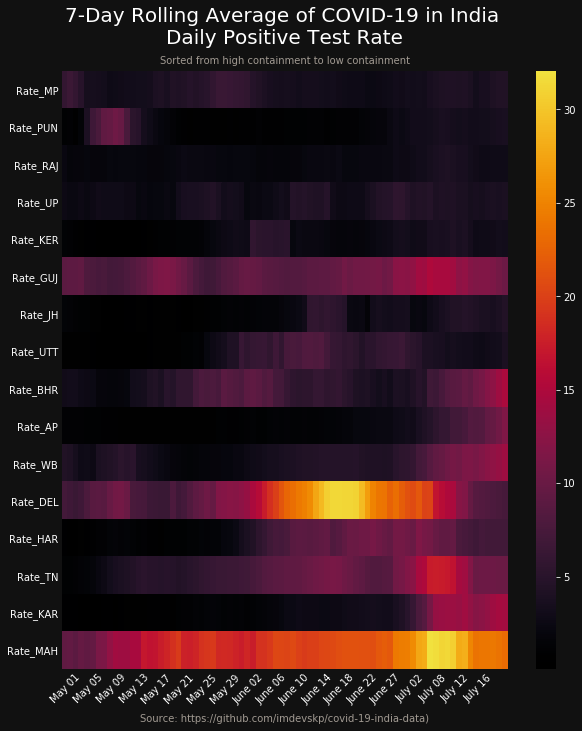

In [28]:
#Plotting the data in a customised smoothed heatmaplookaike (but with different features)
def plot_evolution(dfo, smooth=7, cmap=None):
    # Optionally smooth the data
    df = dfo.rolling(smooth, axis=1).mean().iloc[:, smooth - 1:] if smooth else dfo
        
    if cmap is None: # Default to using cmasher's ember colorscale. Thanks Ellert.
        cmap = plt.get_cmap('cmr.ember') 
    
    # Set up plotting style with dark background
    with plt.style.context("dark_background"):
        fig, ax = plt.subplots(figsize=(10, 11))
        idx = [d.strftime("%B %d") for d in df.columns]
        xlabels = [x if i % 4 == 3 else "" for i, x in enumerate(idx)]
        sns.heatmap(df, ax=ax, cmap=cmap, xticklabels=xlabels, cbar_kws={"aspect": 30})
        ax.set_xticklabels(labels=xlabels, rotation=45, ha="right")
        ax.tick_params(axis='both', which='both', length=0)
        ax.set_xlabel('')
        ax.set_ylabel('')
        fig.patch.set_facecolor('#111111')
        ax.set_title('7-Day Rolling Average of COVID-19 in India \nDaily Positive Test Rate\n', 
                     size=20, pad=5)
        ax.annotate('Source: https://github.com/imdevskp/covid-19-india-data)', 
                    (0.5,0), (0, -45), xycoords='axes fraction', color="#a19a92",
                    textcoords='offset points', size=10, va='top', ha="center")
        ax.annotate('Sorted from high containment to low containment', 
                    (0.5,1), (0, 15), xycoords='axes fraction', color="#a19a92",
                    textcoords='offset points', size=10, va='top', ha="center")
        fig.savefig("covid19.png", dpi=300, bbox_inches="tight", pad_inches=0.5, 
                    facecolor=fig.get_facecolor())

plot_evolution(df_sorted)

In [29]:
#for the second visualisation, our choice of variable is the no of cases/100k population

df_final_2 = stack.drop(columns=['AP', 'BHR', 'DEL', 'GUJ', 'HAR', 'JH', 'KAR', 'KER', 'MP', 'MAH',
       'PUN', 'RAJ', 'TN', 'UP', 'UTT', 'WB', 'Tests_AP', 'Tests_BHR',
       'Tests_DEL', 'Tests_GUJ', 'Tests_HAR', 'Tests_JH', 'Tests_KAR',
       'Tests_KER', 'Tests_MP', 'Tests_MAH', 'Tests_PUN', 'Tests_RAJ',
       'Tests_TN', 'Tests_UP', 'Tests_UTT', 'Tests_WB','Rate_MAH','Rate_DEL', 'Rate_AP', 'Rate_BHR', 'Rate_DEL', 'Rate_GUJ',
       'Rate_HAR', 'Rate_JH', 'Rate_KAR', 'Rate_KER', 'Rate_MP', 'Rate_MAH',
       'Rate_PUN', 'Rate_RAJ', 'Rate_TN', 'Rate_UP', 'Rate_UTT', 'Rate_WB'])
df_final_2

,Pop_AP,Pop_BHR,Pop_DEL,Pop_GUJ,Pop_HAR,Pop_JH,Pop_KAR,Pop_KER,Pop_MP,Pop_MAH,Pop_PUN,Pop_RAJ,Pop_TN,Pop_UP,Pop_UTT,Pop_WB
2020-04-22,0.107237,0.014224,0.464318,0.337082,0.027902,0.010694,0.013678,0.031317,0.048643,0.355292,0.020094,0.298975,0.043596,0.068895,0.000000,0.034054
2020-04-23,0.157025,0.008367,0.646008,0.319418,0.034877,0.010694,0.027356,0.025623,0.130120,0.636906,0.087076,0.095776,0.071339,0.027114,0.008976,0.059852
2020-04-24,0.114896,0.058568,0.696477,0.281147,0.000000,0.010694,0.044074,0.008541,0.186059,0.316816,0.070331,0.090598,0.095119,0.049338,0.008976,0.058820
2020-04-25,0.202983,0.016734,0.560210,0.376825,0.059291,0.026736,0.039515,0.019929,0.296721,0.663921,0.000000,0.063419,0.087192,0.098676,0.000000,0.041277
2020-04-26,0.068938,0.025937,1.478752,0.338554,0.000000,0.040104,0.004559,0.002847,0.000000,0.360204,0.050236,0.132015,0.084550,0.011112,0.017952,0.039213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-14,3.669022,1.108601,8.105380,1.346856,2.559989,0.516001,3.793428,1.730961,0.970425,5.518489,1.115242,0.821858,5.979259,0.708511,0.700117,1.434380
2020-07-15,4.657130,1.111111,8.312304,1.346856,2.364676,0.612250,4.826894,1.773665,0.775854,6.528698,0.964533,1.120832,5.939626,0.737402,0.888610,1.639733
2020-07-16,4.965435,1.158802,8.337539,1.352744,2.427455,0.590862,6.336059,2.055516,0.893813,7.073915,0.987977,0.953872,6.009644,0.914752,1.768243,1.743958
2020-07-17,4.982670,1.457497,7.378621,1.396903,2.772740,0.836831,5.612633,2.251957,0.856114,6.801307,1.165478,0.795972,5.995112,0.765405,1.077103,1.954471


In [30]:
day_of_year = df_final_2.index.dayofyear.to_numpy()
day_weight = day_of_year - day_of_year.mean()
sort_weight = (df_final_2.T * day_weight).sum(axis=1)
df_sorted = df_final_2.iloc[:, sort_weight.argsort()].T
df_sorted

,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,...,2020-07-09,2020-07-10,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18
Pop_MP,0.048643,0.130120,0.186059,0.296721,0.000000,0.087557,0.266320,0.211596,0.120391,0.071748,...,0.370902,0.384279,0.661543,0.524127,0.699241,0.970425,0.775854,0.893813,0.856114,0.828145
Pop_JH,0.010694,0.010694,0.010694,0.026736,0.040104,0.000000,0.056145,0.010694,0.005347,0.005347,...,0.401037,0.462530,0.518675,0.382322,0.379649,0.516001,0.612250,0.590862,0.836831,0.772665
Pop_UP,0.068895,0.027114,0.049338,0.098676,0.011112,0.038670,0.043560,0.036003,0.030670,0.055561,...,0.536050,0.594722,0.618724,0.615169,0.735180,0.708511,0.737402,0.914752,0.765405,0.832522
Pop_RAJ,0.298975,0.095776,0.090598,0.063419,0.132015,0.099658,0.132015,0.095776,0.188963,0.106130,...,0.647132,0.790795,0.742907,0.833506,0.704080,0.821858,1.120832,0.953872,0.795972,0.920222
Pop_BHR,0.014224,0.008367,0.058568,0.016734,0.025937,0.059404,0.017570,0.021754,0.021754,0.044344,...,0.631693,0.527945,0.667671,1.061747,1.101908,1.108601,1.111111,1.158802,1.457497,1.394746
Pop_PUN,0.020094,0.087076,0.070331,0.000000,0.050236,0.000000,0.030142,0.117218,0.000000,0.411936,...,0.780334,0.726749,0.770287,0.783683,1.195619,1.115242,0.964533,0.987977,1.165478,1.172176
Pop_UTT,0.000000,0.008976,0.008976,0.000000,0.017952,0.008976,0.026928,0.008976,0.017952,0.008976,...,0.421865,0.610358,0.394938,1.077103,0.637286,0.700117,0.888610,1.768243,1.077103,1.561799
Pop_GUJ,0.337082,0.319418,0.281147,0.376825,0.338554,0.363577,0.288507,0.497527,0.460728,0.479863,...,1.267369,1.287977,1.283561,1.293865,1.327720,1.346856,1.346856,1.352744,1.396903,1.413095
Pop_KER,0.031317,0.025623,0.008541,0.019929,0.002847,0.065480,0.011388,0.028470,0.005694,0.000000,...,0.965125,1.184342,1.389324,1.238434,1.278292,1.730961,1.773665,2.055516,2.251957,1.688256
Pop_WB,0.034054,0.059852,0.058820,0.041277,0.039213,0.049533,0.028894,0.034054,0.038181,0.000000,...,1.122737,1.236250,1.386911,1.609807,1.480816,1.434380,1.639733,1.743958,1.954471,2.268177


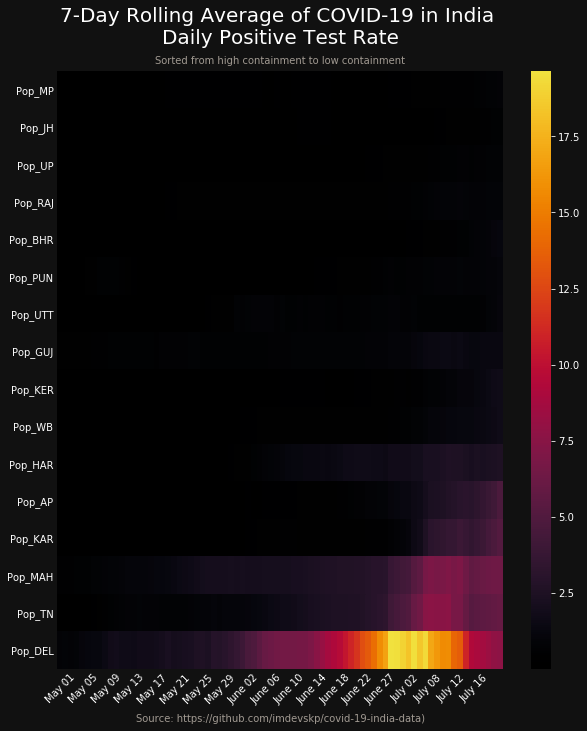

In [31]:
def plot_evolution(dfo, smooth=7, cmap=None):
    # Optionally smooth the data
    df = dfo.rolling(smooth, axis=1).mean().iloc[:, smooth - 1:] if smooth else dfo
        
    if cmap is None: # Default to using cmasher's ember colorscale. Thanks Ellert.
        cmap = plt.get_cmap('cmr.ember') 
    
    # Set up plotting style with dark bg
    with plt.style.context("dark_background"):
        fig, ax = plt.subplots(figsize=(10, 11))
        idx = [d.strftime("%B %d") for d in df.columns]
        xlabels = [x if i % 4 == 3 else "" for i, x in enumerate(idx)]
        sns.heatmap(df, ax=ax, cmap=cmap, xticklabels=xlabels, cbar_kws={"aspect": 30})
        ax.set_xticklabels(labels=xlabels, rotation=45, ha="right")
        ax.tick_params(axis='both', which='both', length=0)
        ax.set_xlabel('')
        ax.set_ylabel('')
        fig.patch.set_facecolor('#111111')
        ax.set_title('7-Day Rolling Average of COVID-19 in India \nDaily Positive Test Rate\n', 
                     size=20, pad=5)
        ax.annotate('Source: https://github.com/imdevskp/covid-19-india-data)', 
                    (0.5,0), (0, -45), xycoords='axes fraction', color="#a19a92",
                    textcoords='offset points', size=10, va='top', ha="center")
        ax.annotate('Sorted from high containment to low containment', 
                    (0.5,1), (0, 15), xycoords='axes fraction', color="#a19a92",
                    textcoords='offset points', size=10, va='top', ha="center")
        fig.savefig("covid19.png", dpi=300, bbox_inches="tight", pad_inches=0.5, 
                    facecolor=fig.get_facecolor())

plot_evolution(df_sorted)

In [32]:
#We carried out Linear Regression using the above two variables independently and together to understand 
#their impact on the predictor variable (i.e the number of daily cases)

#A comparison of R-Squared values showed that % positive cases/test could explain around 63% of the relationship while
# no of positive cases/100K population could explain around 20% of the relationship

#Weights of 0.84 and 0.16 were given to the 2 variables respectively and combined into a single new variable

stack['Weighted_AP'] = stack.apply(lambda row: row.Rate_AP*0.84 + row.Pop_AP*0.16, axis = 1) 
stack['Weighted_BHR'] = stack.apply(lambda row: row.Rate_BHR*0.84 + row.Pop_BHR*0.16, axis = 1) 
stack['Weighted_DEL'] = stack.apply(lambda row: row.Rate_DEL*0.84 + row.Pop_DEL*0.16, axis = 1) 
stack['Weighted_GUJ'] = stack.apply(lambda row: row.Rate_GUJ*0.84 + row.Pop_GUJ*0.16, axis = 1) 
stack['Weighted_HAR'] = stack.apply(lambda row: row.Rate_HAR*0.84 + row.Pop_HAR*0.16, axis = 1) 
stack['Weighted_JH'] = stack.apply(lambda row: row.Rate_JH*0.84 + row.Pop_JH*0.16, axis = 1) 
stack['Weighted_KAR'] = stack.apply(lambda row: row.Rate_KAR*0.84 + row.Pop_KAR*0.16, axis = 1) 
stack['Weighted_KER'] = stack.apply(lambda row: row.Rate_KER*0.84 + row.Pop_KER*0.16, axis = 1) 
stack['Weighted_MP'] = stack.apply(lambda row: row.Rate_MP*0.84 + row.Pop_MP*0.16, axis = 1) 
stack['Weighted_MAH'] = stack.apply(lambda row: row.Rate_MAH*0.84 + row.Pop_MAH*0.16, axis = 1) 
stack['Weighted_PUN'] = stack.apply(lambda row: row.Rate_PUN*0.84 + row.Pop_PUN*0.16, axis = 1) 
stack['Weighted_RAJ'] = stack.apply(lambda row: row.Rate_RAJ*0.84 + row.Pop_RAJ*0.16, axis = 1) 
stack['Weighted_TN'] = stack.apply(lambda row: row.Rate_TN*0.84 + row.Pop_TN*0.16, axis = 1) 
stack['Weighted_UP'] = stack.apply(lambda row: row.Rate_UP*0.84 + row.Pop_UP*0.16, axis = 1) 
stack['Weighted_UTT'] = stack.apply(lambda row: row.Rate_UTT*0.84 + row.Pop_UTT*0.16, axis = 1) 
stack['Weighted_WB'] = stack.apply(lambda row: row.Rate_WB*0.84 + row.Pop_WB*0.16, axis = 1) 

In [33]:
df_final_3 = stack.drop(columns=['AP', 'BHR', 'DEL', 'GUJ', 'HAR', 'JH', 'KAR', 'KER', 'MP', 'MAH',
       'PUN', 'RAJ', 'TN', 'UP', 'UTT', 'WB', 'Tests_AP', 'Tests_BHR',
       'Tests_DEL', 'Tests_GUJ', 'Tests_HAR', 'Tests_JH', 'Tests_KAR',
       'Tests_KER', 'Tests_MP', 'Tests_MAH', 'Tests_PUN', 'Tests_RAJ',
       'Tests_TN', 'Tests_UP', 'Tests_UTT', 'Tests_WB', 'Pop_AP', 'Pop_BHR', 'Pop_DEL', 'Pop_GUJ',
       'Pop_HAR', 'Pop_JH', 'Pop_KAR', 'Pop_KER', 'Pop_MP', 'Pop_MAH',
       'Pop_PUN', 'Pop_RAJ', 'Pop_TN', 'Pop_UP', 'Pop_UTT', 'Pop_WB','Rate_AP', 'Rate_BHR',
       'Rate_DEL', 'Rate_GUJ', 'Rate_HAR', 'Rate_JH', 'Rate_KAR', 'Rate_KER',
       'Rate_MP', 'Rate_MAH', 'Rate_PUN', 'Rate_RAJ', 'Rate_TN', 'Rate_UP',
       'Rate_UTT', 'Rate_WB'])

In [34]:
day_of_year = df_final_3.index.dayofyear.to_numpy()
day_weight = day_of_year - day_of_year.mean()
sort_weight = (df_final_3.T * day_weight).sum(axis=1)
df_sorted = df_final_3.iloc[:, sort_weight.argsort()].T
df_sorted

,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,...,2020-07-09,2020-07-10,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18
Weighted_MP,1.917959,4.791520,7.657069,12.598608,0.000000,3.417498,4.583712,5.297089,1.075263,2.073044,...,2.239770,2.418646,3.485729,3.174257,2.207596,5.527713,2.977355,5.043399,4.277575,3.643890
Weighted_PUN,0.950584,2.524277,0.962709,0.000000,1.211476,0.000000,0.507148,1.801654,0.000000,5.307919,...,2.243953,2.230897,1.972227,3.063067,5.398453,3.393981,2.178760,3.165723,3.448612,2.650066
Weighted_RAJ,4.120029,1.787779,1.260258,0.922988,2.190786,1.353691,1.832922,1.191706,2.103957,1.440415,...,1.866913,2.467630,2.214940,2.605530,3.330001,2.008807,2.853155,2.359678,2.332503,2.185806
Weighted_UP,3.068079,1.561312,1.221483,5.076304,0.426192,1.373191,2.610385,2.001654,1.353755,2.370563,...,3.171858,3.052373,2.859727,3.032480,3.976962,3.473362,3.194140,3.741419,2.790902,3.497227
Weighted_KER,1.628912,1.477784,0.417208,1.403189,0.141870,1.631282,0.475729,0.868753,0.102483,0.000000,...,2.734703,2.823597,3.076093,3.079853,0.753099,2.999197,3.086336,3.597436,4.240481,2.283134
Weighted_GUJ,7.475229,6.202980,3.725644,13.739681,7.013823,8.410829,6.563976,8.462244,5.891818,5.821272,...,9.441921,9.805136,9.697141,9.947915,13.696685,9.702043,8.444619,6.950802,6.436755,6.783792
Weighted_JH,1.345711,1.648770,0.431379,1.043882,1.513594,0.000000,2.718661,0.392409,0.234513,0.215141,...,4.069252,3.390299,3.459697,3.415542,2.889295,3.203253,3.191062,2.669652,5.177438,6.500301
Weighted_UTT,0.000000,0.425679,0.287150,0.000000,2.026969,0.453049,0.917352,0.275052,0.326572,0.177537,...,1.610892,2.196886,1.287436,5.414146,3.080987,2.490240,2.419910,2.563829,2.653873,5.381910
Weighted_BHR,1.460907,1.042231,5.171794,1.750856,2.256745,5.250278,1.097783,1.574704,1.467288,3.085933,...,7.557861,7.063273,7.466511,11.692526,12.294610,11.287378,14.031727,11.541192,14.477140,13.556620
Weighted_WB,3.247554,5.121853,5.086824,3.554651,3.157311,3.514012,1.997843,1.989701,1.637605,0.000000,...,8.637944,9.656584,10.122458,11.448960,11.873189,10.746525,11.983116,11.049898,12.329030,14.074902


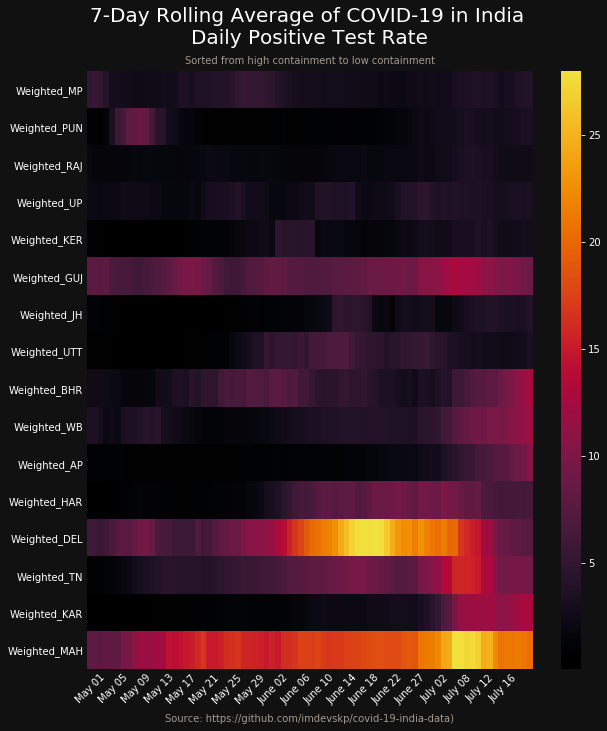

In [35]:
#Final Visualization

def plot_evolution(dfo, smooth=7, cmap=None):
    # Optionally smooth the data
    df = dfo.rolling(smooth, axis=1).mean().iloc[:, smooth - 1:] if smooth else dfo
        
    if cmap is None: # Default to using cmasher's ember colorscale. Thanks Ellert.
        cmap = plt.get_cmap('cmr.ember') 
    
    # Set up plotting style with dark bg
    with plt.style.context("dark_background"):
        fig, ax = plt.subplots(figsize=(10, 11))
        idx = [d.strftime("%B %d") for d in df.columns]
        xlabels = [x if i % 4 == 3 else "" for i, x in enumerate(idx)]
        sns.heatmap(df, ax=ax, cmap=cmap, xticklabels=xlabels, cbar_kws={"aspect": 30})
        ax.set_xticklabels(labels=xlabels, rotation=45, ha="right")
        ax.tick_params(axis='both', which='both', length=0)
        ax.set_xlabel('')
        ax.set_ylabel('')
        fig.patch.set_facecolor('#111111')
        ax.set_title('7-Day Rolling Average of COVID-19 in India \nDaily Positive Test Rate\n', 
                     size=20, pad=5)
        ax.annotate('Source: https://github.com/imdevskp/covid-19-india-data)', 
                    (0.5,0), (0, -45), xycoords='axes fraction', color="#a19a92",
                    textcoords='offset points', size=10, va='top', ha="center")
        ax.annotate('Sorted from high containment to low containment', 
                    (0.5,1), (0, 15), xycoords='axes fraction', color="#a19a92",
                    textcoords='offset points', size=10, va='top', ha="center")
        fig.savefig("covid19.png", dpi=300, bbox_inches="tight", pad_inches=0.5, 
                    facecolor=fig.get_facecolor())

plot_evolution(df_sorted)